In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot
from warnings import filterwarnings

filterwarnings("ignore")

In [ ]:
# Replace 'your_file_name.csv' with the actual filename
filename = '/content/drive/MyDrive/Colab Notebooks/HR_Attrition_Algo/WA_Fn-UseC_-HR-Employee-Attrition.csv'

df = pd.read_csv(filename)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df1 = df.select_dtypes(include=['object'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Attrition       1470 non-null   object
 1   BusinessTravel  1470 non-null   object
 2   Department      1470 non-null   object
 3   EducationField  1470 non-null   object
 4   Gender          1470 non-null   object
 5   JobRole         1470 non-null   object
 6   MaritalStatus   1470 non-null   object
 7   Over18          1470 non-null   object
 8   OverTime        1470 non-null   object
dtypes: object(9)
memory usage: 103.5+ KB


In [ ]:
df1.describe().T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [ ]:
df2 = df.select_dtypes(include=['int64'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   DailyRate                 1470 non-null   int64
 2   DistanceFromHome          1470 non-null   int64
 3   Education                 1470 non-null   int64
 4   EmployeeCount             1470 non-null   int64
 5   EmployeeNumber            1470 non-null   int64
 6   EnvironmentSatisfaction   1470 non-null   int64
 7   HourlyRate                1470 non-null   int64
 8   JobInvolvement            1470 non-null   int64
 9   JobLevel                  1470 non-null   int64
 10  JobSatisfaction           1470 non-null   int64
 11  MonthlyIncome             1470 non-null   int64
 12  MonthlyRate               1470 non-null   int64
 13  NumCompaniesWorked        1470 non-null   int64
 14  PercentSalaryHike         1470 non-null 

In [ ]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
df.duplicated().any()

False

In [ ]:
df["StandardHours"].unique()

array([80])

In [ ]:
# remove 4 columns
df = df.drop(['Over18', 'EmployeeNumber','EmployeeCount','StandardHours'],axis=1)

In [ ]:
# to separate categorical and numerical columns
cat = df.select_dtypes(['object']).columns
num = df.select_dtypes(['number']).columns
print(cat)
print(num)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


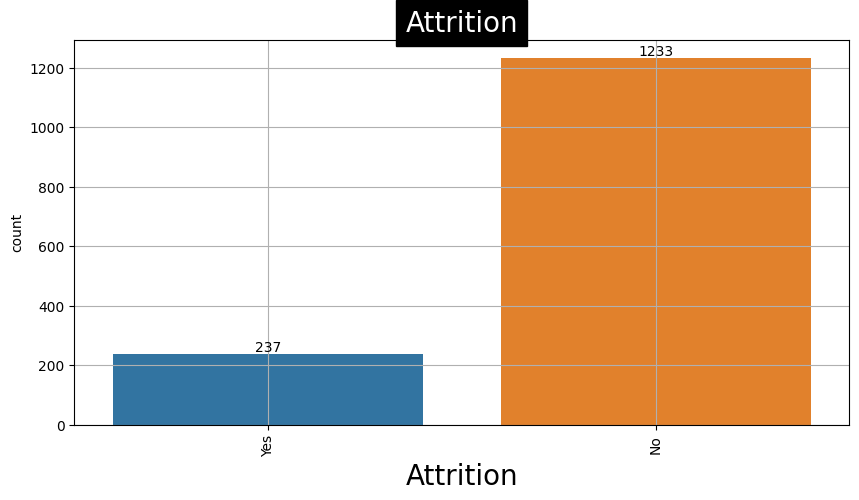

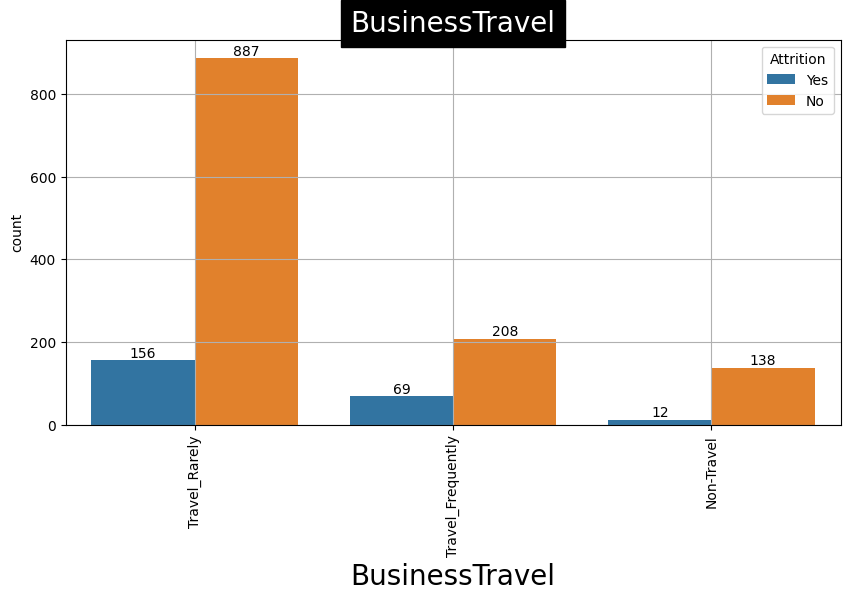

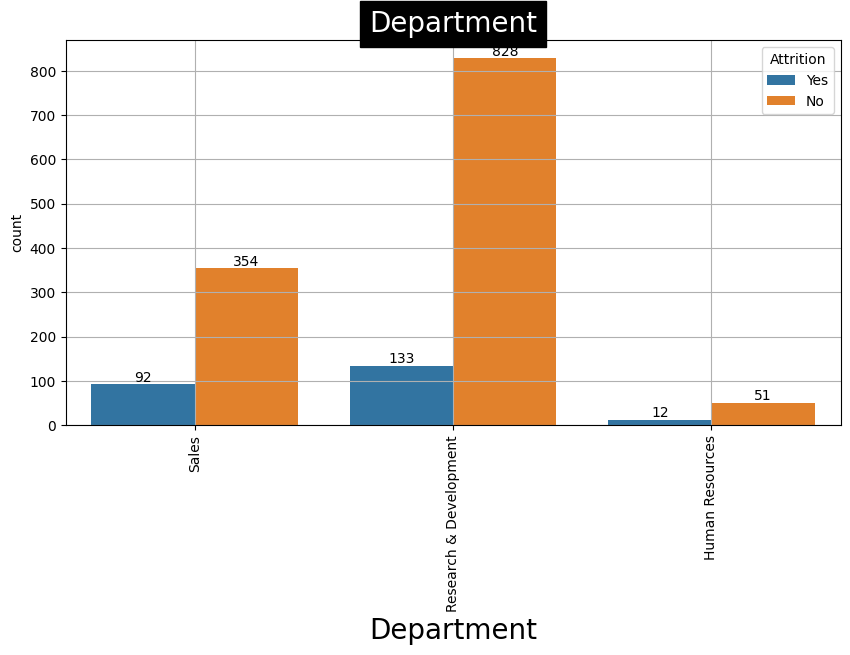

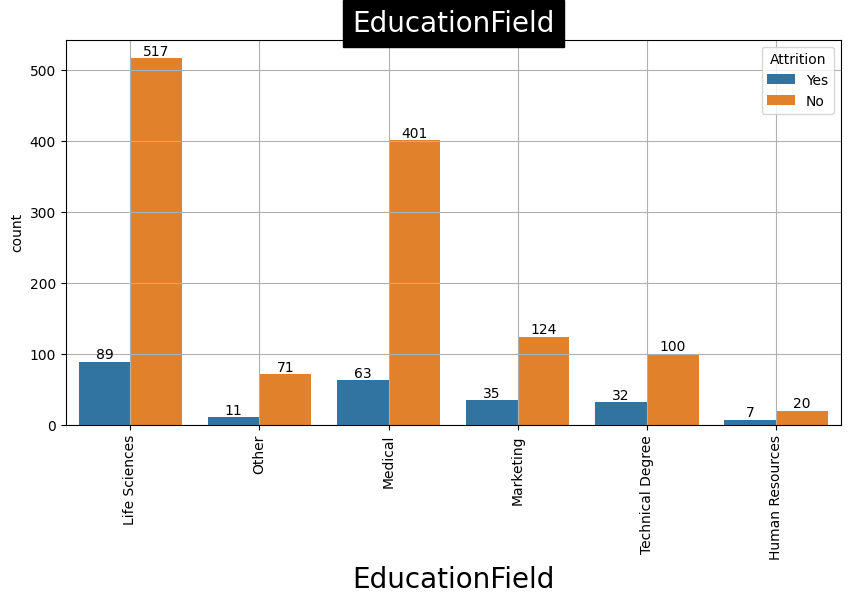

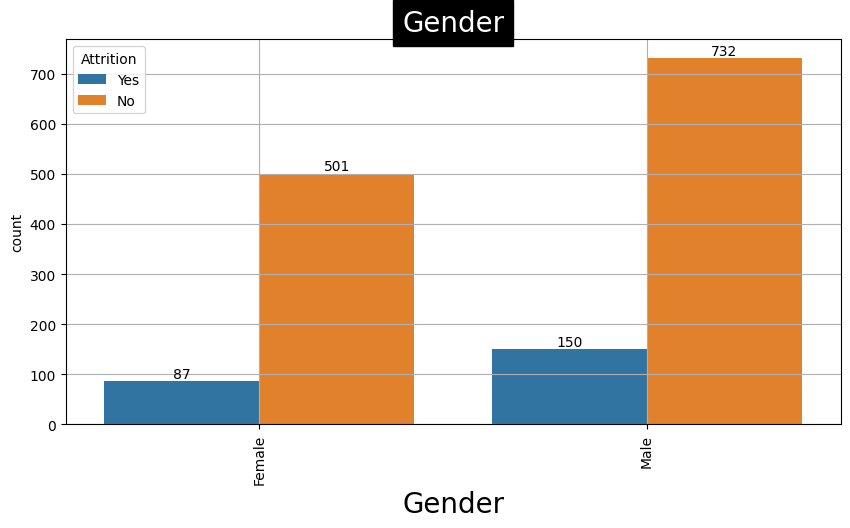

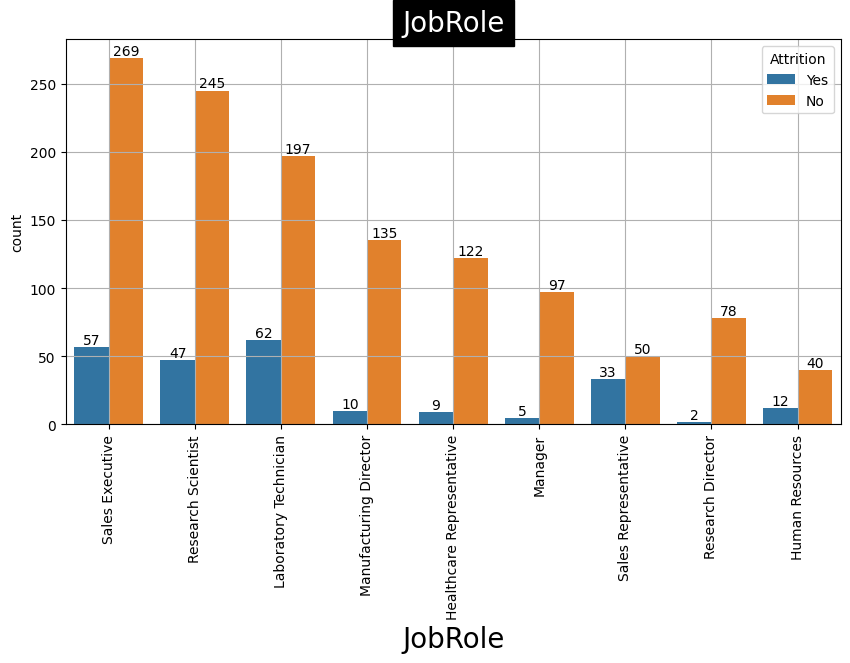

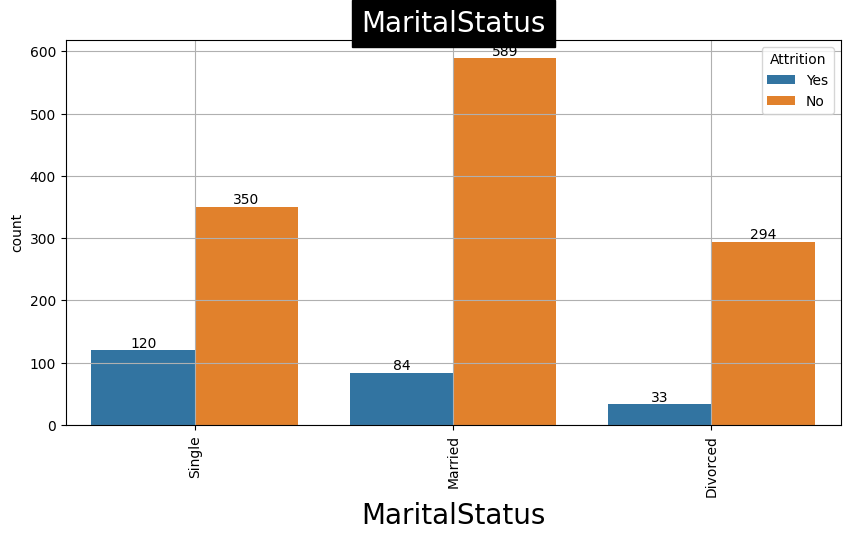

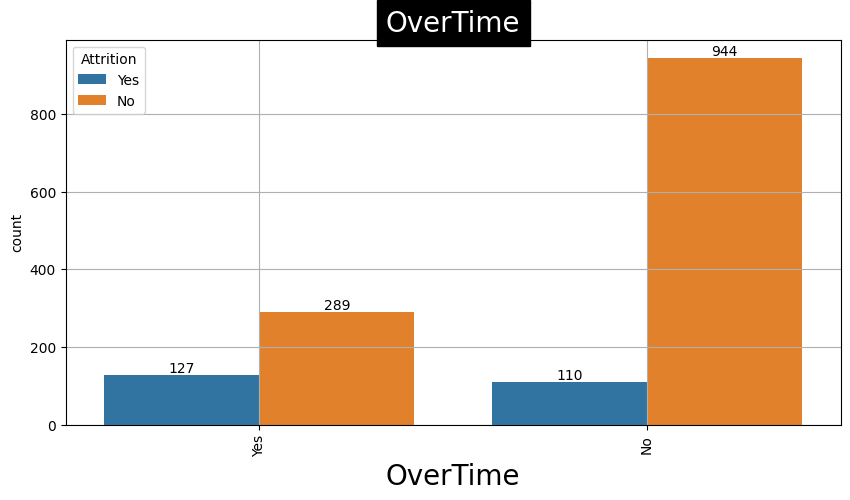

In [ ]:
for column in cat :
    plt.figure(figsize=(10,5))

    ax=sns.countplot(x=df[column], data=df,hue="Attrition")
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(column,backgroundcolor='black',color='white',fontsize=20)
    plt.xticks(rotation=90)
    plt.xlabel(column,fontsize=20)
    plt.grid()
    plt.show()

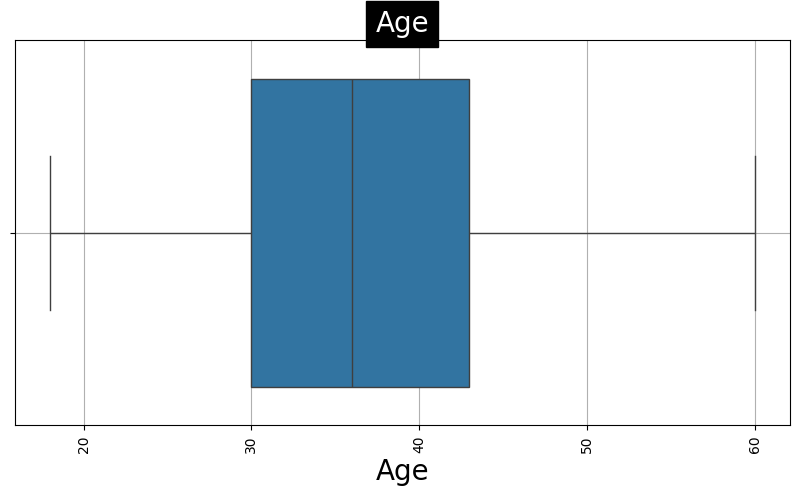

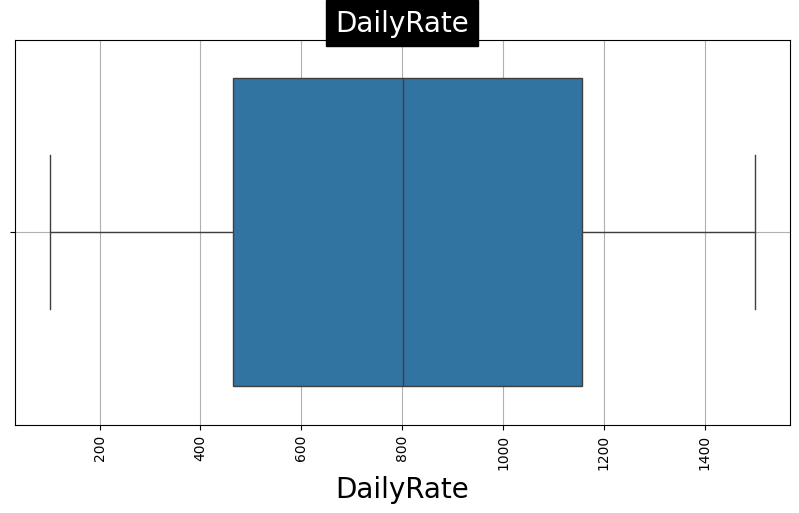

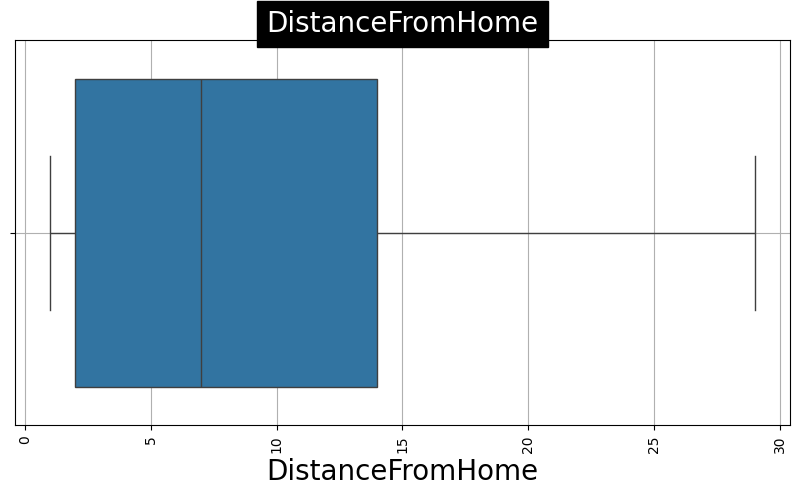

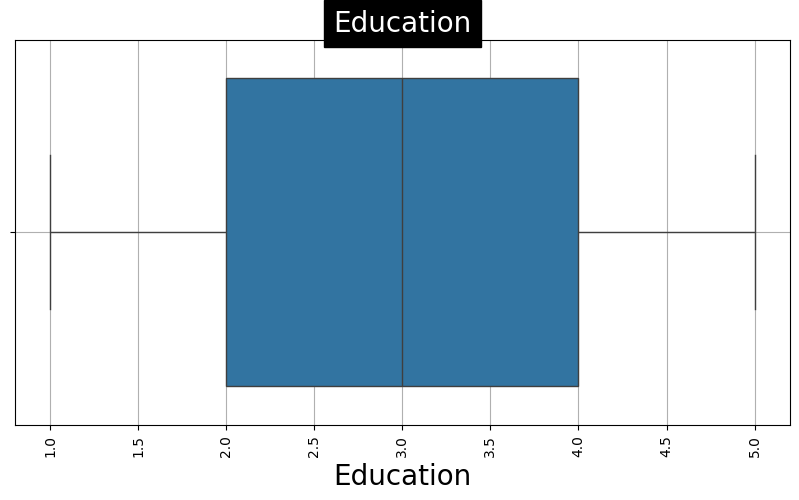

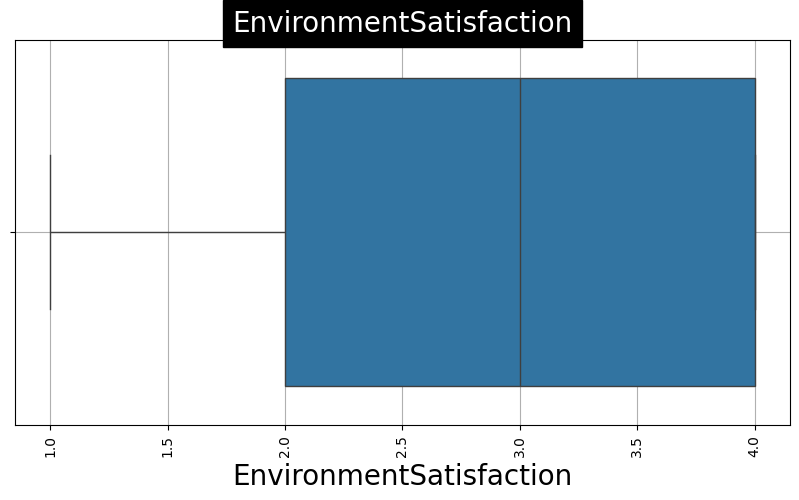

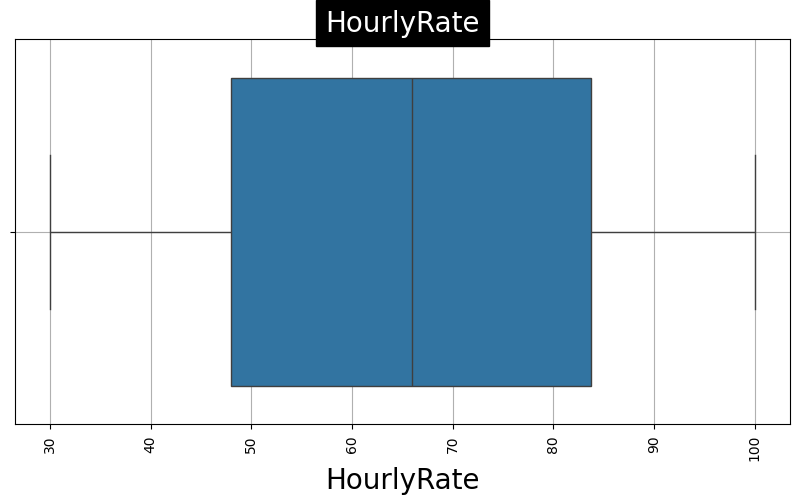

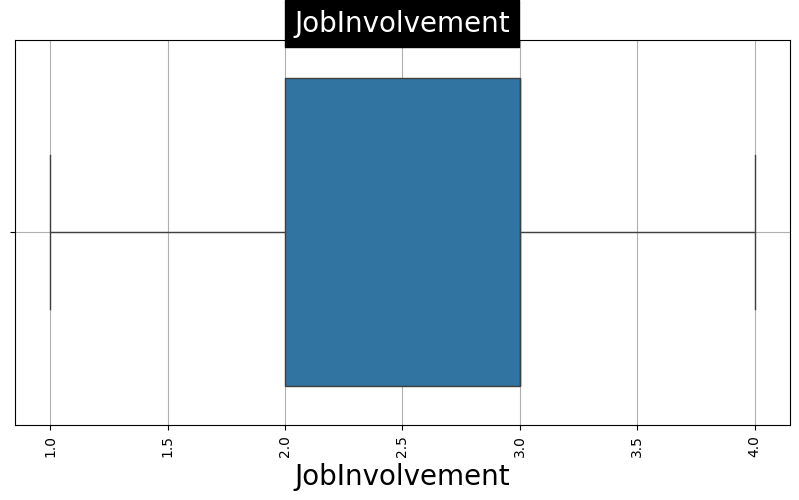

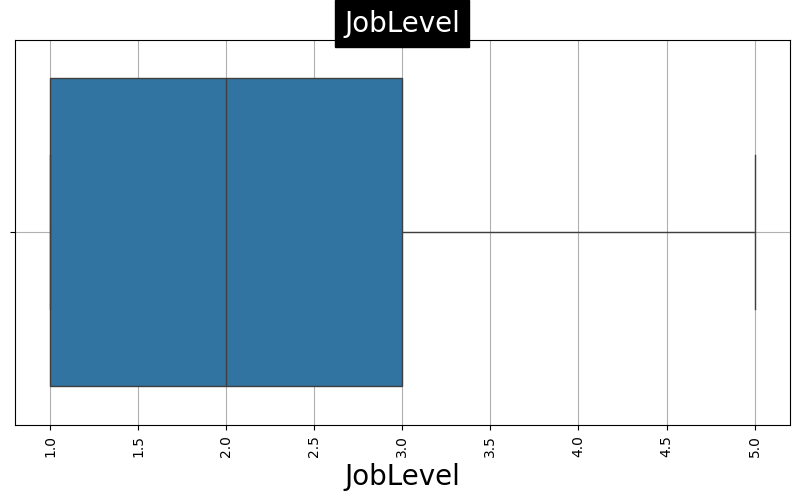

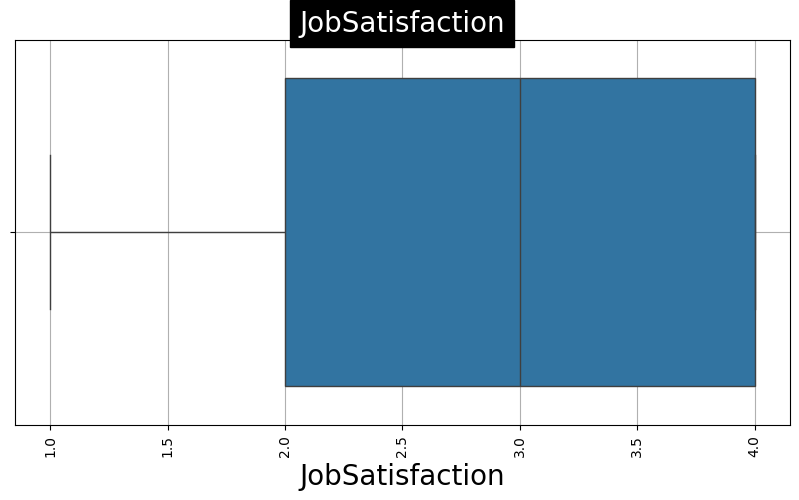

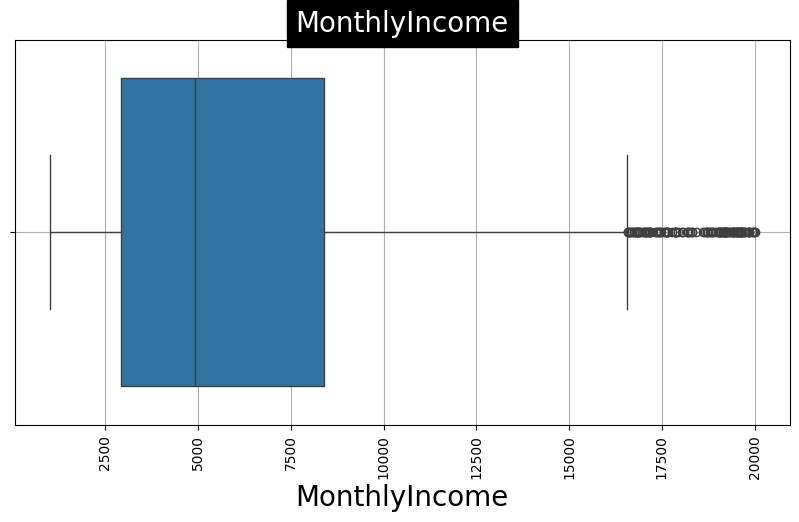

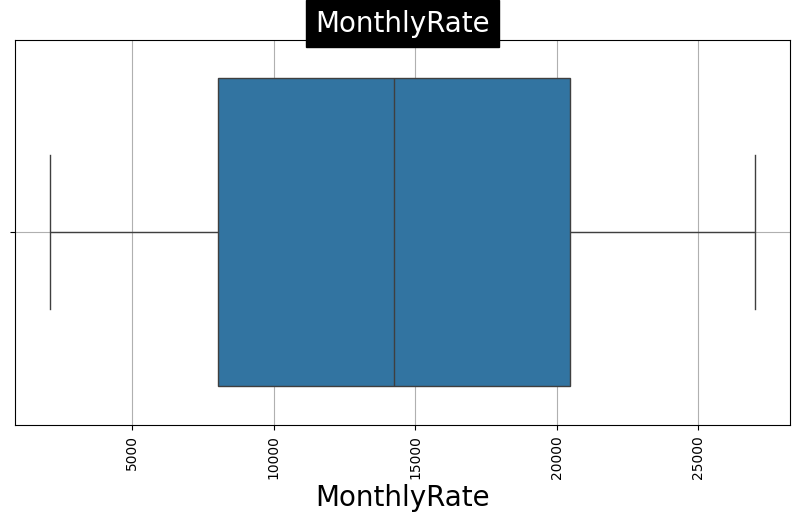

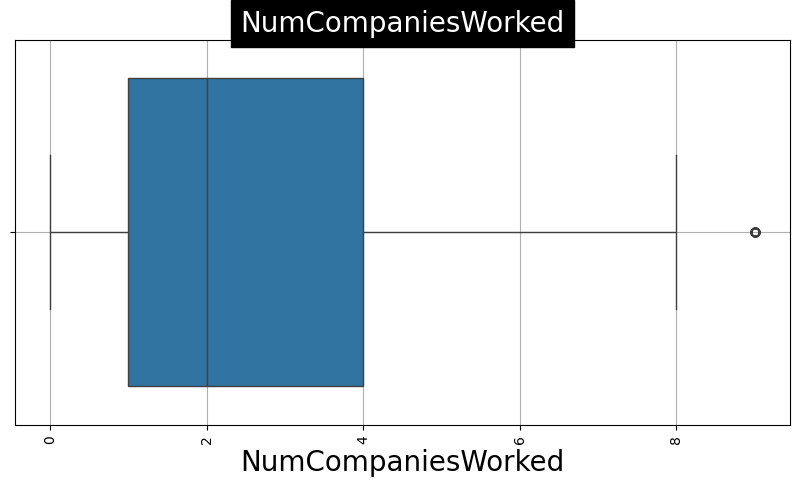

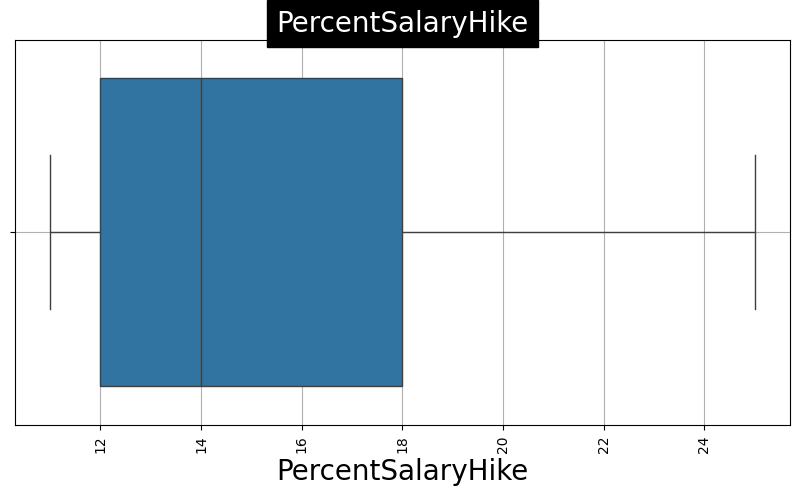

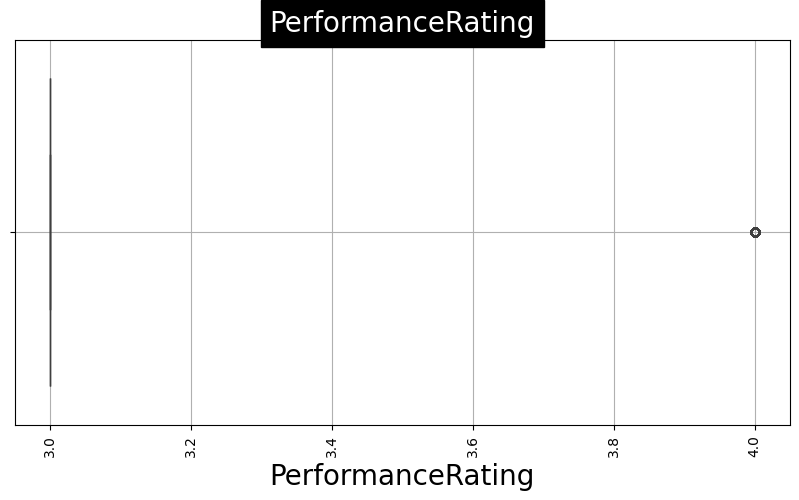

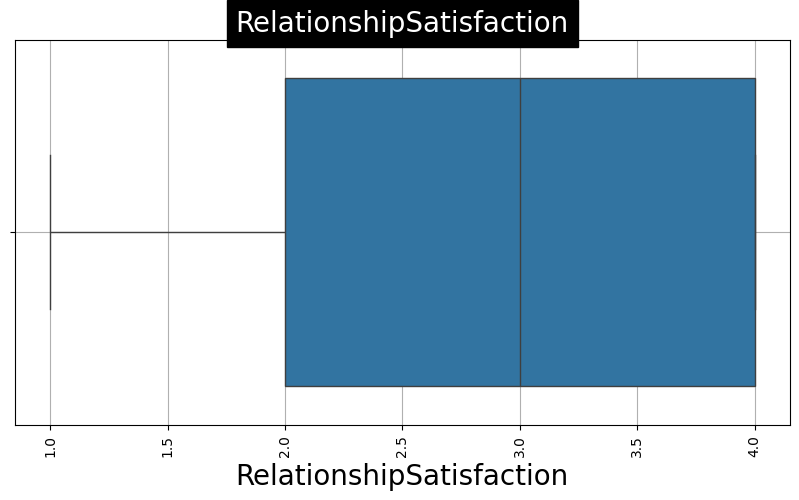

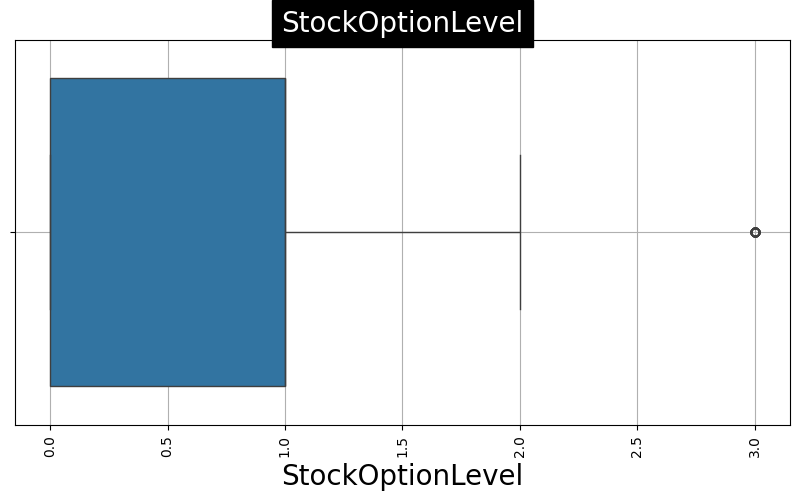

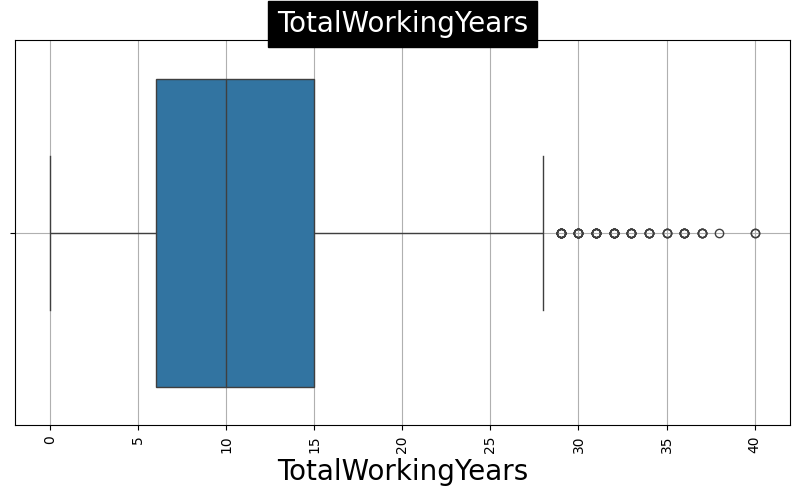

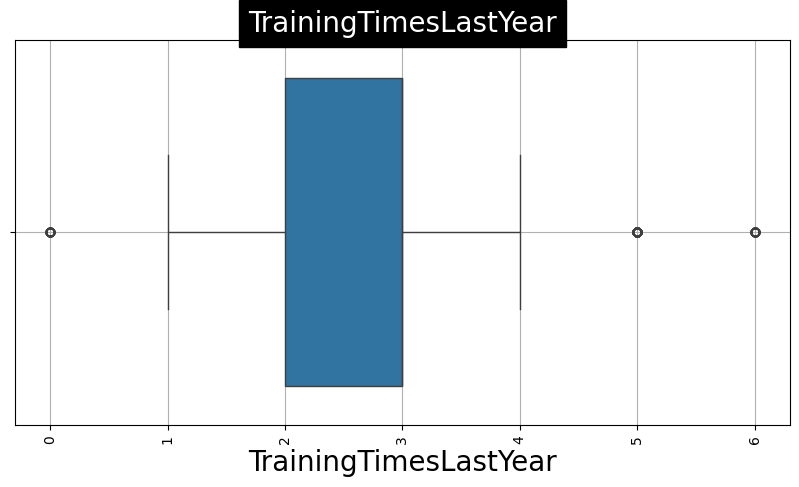

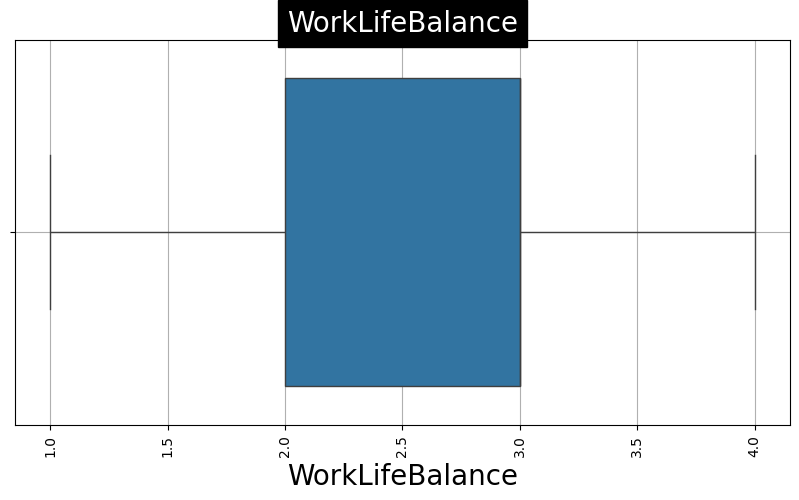

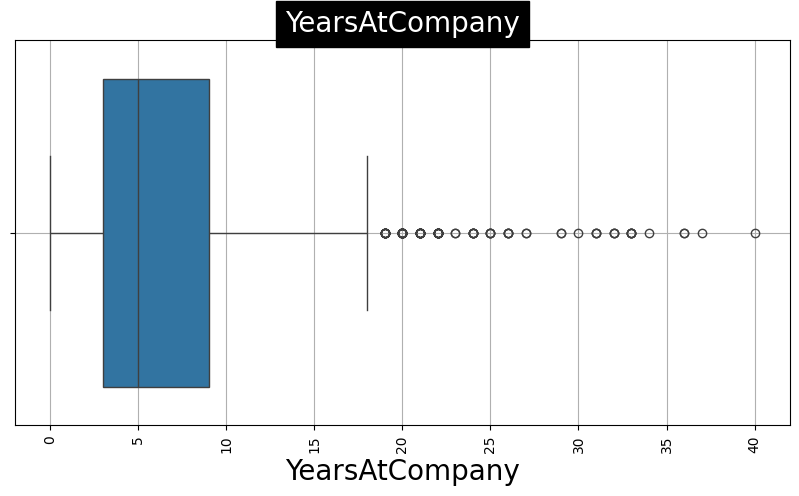

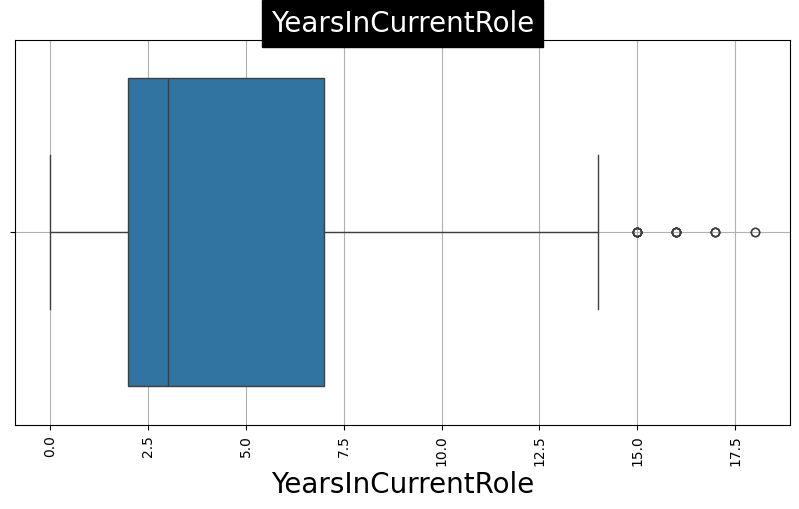

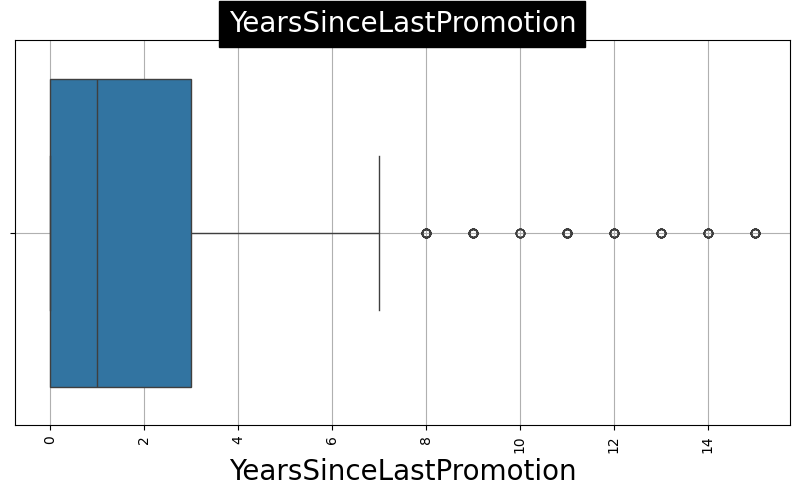

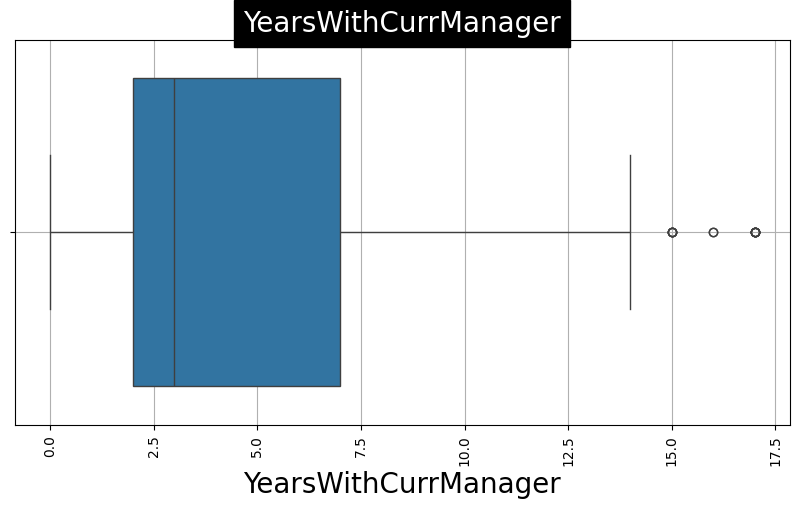

In [ ]:
for column in num :
    plt.figure(figsize=(10,5))

    ax=sns.boxplot(x=df[column], data=df)
    ###for container in ax.containers:
        ###ax.bar_label(container)
    plt.title(column,backgroundcolor='black',color='white',fontsize=20)
    plt.xticks(rotation=90)
    plt.xlabel(column,fontsize=20)
    plt.grid()
    plt.show()

In [ ]:
df_copy = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df_copy['Attrition']=label_encoder.fit_transform(df['Attrition'])
df_copy['OverTime']=label_encoder.fit_transform(df['OverTime'])
df_copy['Gender']=label_encoder.fit_transform(df['Gender'])

In [ ]:
df_copy=pd.get_dummies(df_copy, columns=['BusinessTravel', 'Department', 'EducationField',
                               'JobRole', 'MaritalStatus'])

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   Gender                             1470 non-null   int64
 7   HourlyRate                         1470 non-null   int64
 8   JobInvolvement                     1470 non-null   int64
 9   JobLevel                           1470 non-null   int64
 10  JobSatisfaction                    1470 non-null   int64
 11  MonthlyIncome                      1470 non-null   int64
 12  MonthlyRate         

In [ ]:
DF = df.copy()

In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [ ]:
DF['BusinessTravel'] = DF['BusinessTravel'].replace('Travel_Rarely',2)

In [ ]:
###DF['BusinessTravel'] = DF['BusinessTravel'].replace('Travel_Rarely',2)
DF['BusinessTravel'] = DF['BusinessTravel'].replace('Travel_Frequently',3)
DF['BusinessTravel'] = DF['BusinessTravel'].replace('Non-Travel',4)

DF['Attrition'] = DF['Attrition'].replace('Yes',2)
DF['Attrition'] = DF['Attrition'].replace('No',3)

DF['OverTime'] = DF['OverTime'].replace('Yes',2)
DF['OverTime'] = DF['OverTime'].replace('No',3)

DF['Gender'] = DF['Gender'].replace('Male',2)
DF['Gender'] = DF['Gender'].replace('Female',3)

DF['MaritalStatus'] = DF['MaritalStatus'].replace('Single',2)
DF['MaritalStatus'] = DF['MaritalStatus'].replace('Married',3)
DF['MaritalStatus'] = DF['MaritalStatus'].replace('Divorced',4)

DF['Department'] = DF['Department'].replace('Sales',2)
DF['Department'] = DF['Department'].replace('Human Resources',3)
DF['Department'] = DF['Department'].replace('Research & Development',4)

DF['EducationField'] = DF['EducationField'].replace('Life Sciences',2)
DF['EducationField'] = DF['EducationField'].replace('Medical',3)
DF['EducationField'] = DF['EducationField'].replace('Marketing',4)
DF['EducationField'] = DF['EducationField'].replace('Technical Degree',2)
DF['EducationField'] = DF['EducationField'].replace('Human Resources',3)
DF['EducationField'] = DF['EducationField'].replace('Other',4)

DF['JobRole'] = DF['JobRole'].replace('Sales Executive',2)
DF['JobRole'] = DF['JobRole'].replace('Manufacturing Director',3)
DF['JobRole'] = DF['JobRole'].replace('Healthcare Representative',4)
DF['JobRole'] = DF['JobRole'].replace('Manager',2)
DF['JobRole'] = DF['JobRole'].replace('Research Director',3)
DF['JobRole'] = DF['JobRole'].replace('Laboratory Technician',4)
DF['JobRole'] = DF['JobRole'].replace('Sales Representative',2)
DF['JobRole'] = DF['JobRole'].replace('Research Scientist',3)
DF['JobRole'] = DF['JobRole'].replace('Human Resources',4)


In [ ]:
DF.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,2,1102,2,1,2,2,2,3,...,3,1,0,8,0,1,6,4,0,5
1,49,3,3,279,4,8,1,2,3,2,...,4,4,1,10,3,3,10,7,1,7
2,37,2,2,1373,4,2,2,4,4,2,...,3,2,0,7,3,3,0,0,0,0
3,33,3,3,1392,4,3,4,2,4,3,...,3,3,0,8,3,3,8,7,3,0
4,27,3,2,591,4,2,1,3,1,2,...,3,4,1,6,3,3,2,2,2,2


In [ ]:
DF = DF.drop(['MonthlyIncome' ,'YearsInCurrentRole' , 'YearsAtCompany', 'YearsWithCurrManager'],axis=1)

In [ ]:
#normalizing
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
DF1 = DF.drop(columns=['Attrition'])
norm = scaler.fit_transform(DF)
norm_df = pd.DataFrame(norm,columns=DF.columns)

In [ ]:
X = pd.DataFrame(norm_df.drop(columns='Attrition'))
Y = pd.DataFrame(norm_df.Attrition).values.reshape(-1, 1)

In [ ]:
x_train  , x_test , y_train, y_test = train_test_split (X ,Y ,test_size = 0.2 , random_state = 0)

In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_resample(x_train,y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression(C=1000,max_iter=10000)
log_reg.fit(smote_train, smote_target)
y_pred_lg = log_reg.predict(x_test)

print ('accuracy',metrics.accuracy_score(y_test, y_pred_lg))

accuracy 0.7687074829931972


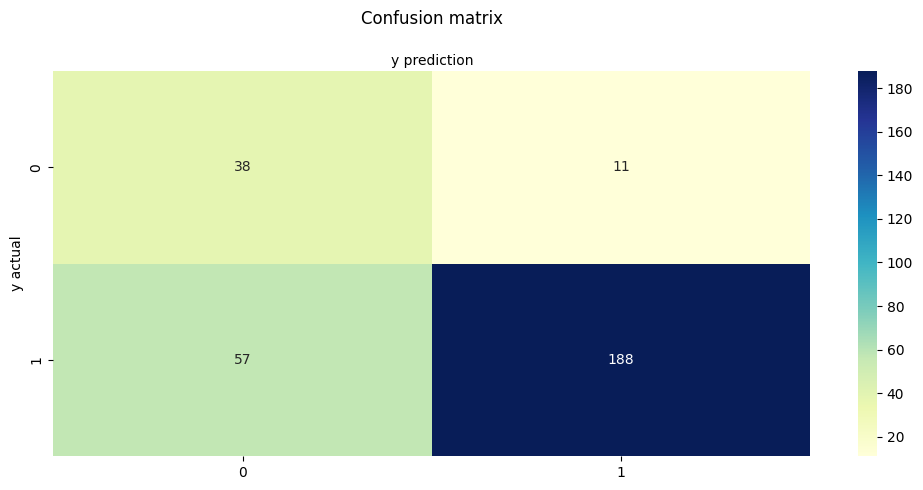

              precision    recall  f1-score   support

         0.0       0.40      0.78      0.53        49
         1.0       0.94      0.77      0.85       245

    accuracy                           0.77       294
   macro avg       0.67      0.77      0.69       294
weighted avg       0.85      0.77      0.79       294



In [ ]:

fig, ax = plt.subplots(figsize=(10,5))
cm = metrics.confusion_matrix(y_test,y_pred_lg)
sns.heatmap(metrics.confusion_matrix(y_test,y_pred_lg),annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('y prediction')
plt.ylabel('y actual')
plt.show()

print(metrics.classification_report(y_test, y_pred_lg))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

rfc = RandomForestClassifier()
rfc = rfc.fit(smote_train , smote_target)
y_pred = rfc.predict(x_test)

print ('accuracy',metrics.accuracy_score(y_test, y_pred))

accuracy 0.9795918367346939


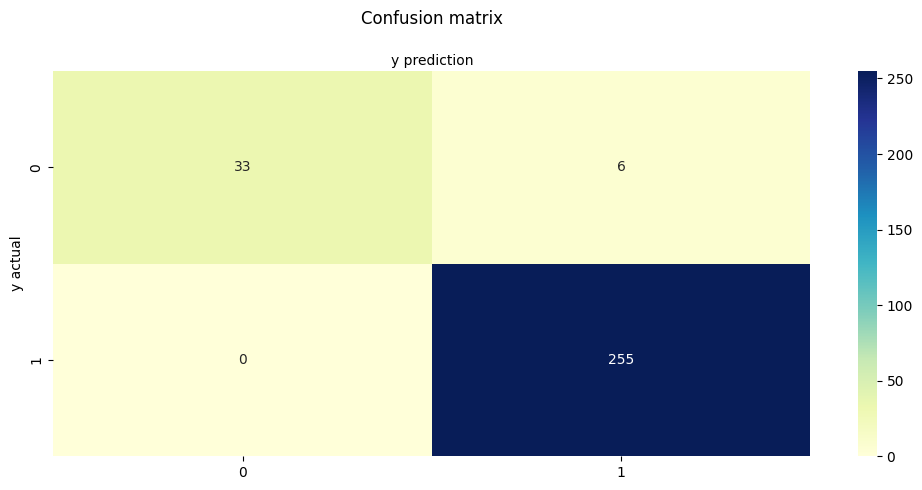

              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92        39
         1.0       0.98      1.00      0.99       255

    accuracy                           0.98       294
   macro avg       0.99      0.92      0.95       294
weighted avg       0.98      0.98      0.98       294



In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('y prediction')
plt.ylabel('y actual')
plt.show()

print(metrics.classification_report(y_test, y_pred))

In [ ]:
import pandas as pd

data = {
    'Stock Price ($)': [150, 135, 145, 160, 155, 140, 130, 170, 165, 125],
    'Trading Volume (Shares)': [1200000, 1000000, 1150000, 1300000, 1250000, 1100000, 950000, 1400000, 1350000, 900000],
    'Market Capitalization ($ Billion)': [75.0, 67.5, 72.5, 80.0, 77.5, 70.0, 65.0, 85.0, 82.5, 62.5]
}

df = pd.DataFrame(data)
print(df)


   Stock Price ($)  Trading Volume (Shares)  Market Capitalization ($ Billion)
0              150                  1200000                               75.0
1              135                  1000000                               67.5
2              145                  1150000                               72.5
3              160                  1300000                               80.0
4              155                  1250000                               77.5
5              140                  1100000                               70.0
6              130                   950000                               65.0
7              170                  1400000                               85.0
8              165                  1350000                               82.5
9              125                   900000                               62.5


In [ ]:
# Calculate mean and standard deviation for each column
mean = df.mean()
std = df.std()

print("Mean:\n", mean)
print("\nStandard Deviation:\n", std)

Mean:
 Stock Price ($)                          147.50
Trading Volume (Shares)              1160000.00
Market Capitalization ($ Billion)         73.75
dtype: float64

Standard Deviation:
 Stock Price ($)                          15.138252
Trading Volume (Shares)              171269.767716
Market Capitalization ($ Billion)         7.569126
dtype: float64


In [ ]:
df.describe()

,Stock Price ($),Trading Volume (Shares),Market Capitalization ($ Billion)
count,10.000000,1.000000e+01,10.000000
mean,147.500000,1.160000e+06,73.750000
std,15.138252,1.712698e+05,7.569126
min,125.000000,9.000000e+05,62.500000
25%,136.250000,1.025000e+06,68.125000
50%,147.500000,1.175000e+06,73.750000
75%,158.750000,1.287500e+06,79.375000
max,170.000000,1.400000e+06,85.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
standardized_data = scaler.fit_transform(df)

# Create a new DataFrame with the standardized data
df_standardized = pd.DataFrame(standardized_data, columns=df.columns)

print(df_standardized)

   Stock Price ($)  Trading Volume (Shares)  Market Capitalization ($ Billion)
0         0.174078                 0.246183                           0.174078
1        -0.870388                -0.984732                          -0.870388
2        -0.174078                -0.061546                          -0.174078
3         0.870388                 0.861640                           0.870388
4         0.522233                 0.553912                           0.522233
5        -0.522233                -0.369274                          -0.522233
6        -1.218544                -1.292461                          -1.218544
7         1.566699                 1.477098                           1.566699
8         1.218544                 1.169369                           1.218544
9        -1.566699                -1.600189                          -1.566699


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Sample data
data = {'score': [50, 60, 70, 80, 90]}
df = pd.DataFrame(data)

mean = df.mean()
std = df.std()

print("Mean:\n", mean)
print("\nStandard Deviation:\n", std)

# Standardizing the data
scaler = StandardScaler()
df['standardized_score'] = scaler.fit_transform(df[['score']])

print(df)


Mean:
 score    70.0
dtype: float64

Standard Deviation:
 score    15.811388
dtype: float64
   score  standardized_score
0     50           -1.414214
1     60           -0.707107
2     70            0.000000
3     80            0.707107
4     90            1.414214
